<a href="https://colab.research.google.com/github/Jeongho-K/Section-Project/blob/main/Section%201/AI_14_%EA%B9%80%EC%A0%95%ED%98%B8_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 게임회사 다음 분기 계획 결정
확인하고자 하는 내용
* 지역에 따라서 선호하는 게임 장르가 다를까
* 연도별 게임의 트렌드가 있을까
* 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

## EDA 및 전처리 과정

### 데이터 불러오기
* Name : 게임의 이름입니다.  
* Platform : 게임이 지원되는 플랫폼의 이름입니다.  
* Year : 게임이 출시된 연도입니다.  
* Genre : 게임의 장르입니다.  
* Publisher : 게임을 제작한 회사입니다.  
* NA_Sales : 북미지역에서의 출고량입니다.(단위 100만)  
* EU_Sales : 유럽지역에서의 출고량입니다.(단위 100만)  
* JP_Sales : 일본지역에서의 출고량입니다.(단위 100만)  
* Other_Sales : 기타지역에서의 출고량입니다.(단위 100만)  

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# url
data_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
# read
df = pd.read_csv(data_url, index_col = 0)

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
np.shape(df)

(16598, 9)

### 데이터 중복행 제거

In [ ]:
df[df.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9185,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [ ]:
df = df.drop_duplicates(ignore_index = True)

### 결측치 제거

In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

### 데이터내 이상값, 데이터형 처리
'Name', 'Publisher'는 고유명사이므로 처리하지 않고 코드북이 없을때도 유추할 수 있는 나머지 변수에서 이상값을 찾아 처리를 진행했다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


#### Name

In [ ]:
df.loc[:,'Name'].unique()

array(["Candace Kane's Candy Factory", 'The Munchables',
       'Otome wa Oanesama Boku ni Koi Shiteru Portable', ...,
       'White Album: Tsuzurareru Fuyu no Omoide', 'Minna no Chizu 2',
       'Rainbow Islands: Revolution'], dtype=object)

#### Platform
이상값은 없어 보인다

In [ ]:
df.loc[:,'Platform'].unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

#### Year
데이터형 변경: 'float' -> 'int'  
* 년도는 정수이므로 데이터형을 변경한다.

70이상 100이하는 1900을 더하고 70미만은 2000을 더함
* 상업적 게임이 나온 첫 시기는 70년대 이므로 70이상은 1900년대로 처리, 70미만은 2000년대로 처리한다.

In [ ]:
df.loc[:,'Year'] = df.loc[:,'Year'].astype('int')

In [ ]:
df.loc[:,'Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
          9,   97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,   15,
       1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8, 1986,
          1,    5,    4,   10,   98,    7,   16,   86,   14,   95, 2017,
       1980, 2020,    2,   13,    0,   12,   94])

In [ ]:
# 70이상 100이하는 1900을 더하고 70미만은 2000을 더함
df['Year'] = df['Year'].apply(lambda x: x+1900 if (x>=70)&(x<100) else x+2000 if x<70 else x)

In [ ]:
df.loc[:,'Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

#### Genre
이상값은 없어 보인다

In [ ]:
df.loc[:,'Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

#### Publisher

In [ ]:
df.loc[:,'Publisher'].unique()

array(['Destineer', 'Namco Bandai Games', 'Alchemist', 'Zoo Games',
       'D3Publisher', 'Konami Digital Entertainment', 'Deep Silver',
       'Tecmo Koei', 'Sega', 'THQ', 'Empire Interactive', 'Ubisoft',
       'Paradox Interactive', '505 Games', 'Tomy Corporation',
       'Eidos Interactive', 'Microsoft Game Studios',
       'Nippon Ichi Software', 'Kalypso Media', 'Electronic Arts',
       'Sony Computer Entertainment', 'Activision',
       'Tru Blu Entertainment', 'Warner Bros. Interactive Entertainment',
       'Midway Games', 'Mindscape', 'Wargaming.net', 'Capcom',
       'Acclaim Entertainment', 'Unknown', 'Nintendo',
       'Disney Interactive Studios', 'Crave Entertainment', 'Sunflowers',
       'Arc System Works', 'Milestone S.r.l', 'Kamui', 'Hudson Soft',
       'Square Enix', 'Focus Home Interactive', 'Take-Two Interactive',
       'Game Factory', 'Takara Tomy', 'SquareSoft', 'Global Star',
       'Infogrames', 'GT Interactive', 'Storm City Games',
       'Gathering of Dev

#### NA_Sales
숫자, 숫자M, 숫자K 3경우 데이터가 보인다. 데이터 절삭이 있어 소수점 3째자리 부터 숫자를 알 수 없다. 때문에 해당 스케일을 맞추기 위해 이들 단위를 기존 100만으로 맞춰준다.
* 숫자: 단위 100만으로 나둔다.
* 숫자M: 단위는 100만으로 맞으므로 M만을 제거한다.
* 숫자K: 단위가 1천으로 K를 제거 후 1,000으로 나눈다.
* 소수점 3째자리 부터 절삭한 것으로 보인다.  

데이터형 변경: 'object' -> 'float'  
* sales는 출고량이므로 float로 변경(단위 100만)

In [ ]:
df.loc[:,'NA_Sales'].unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '0.29',
       '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51', '60K',
       '0.13', '0.34', '0.25', '0.41', '0.52', '0.22', '0.35', '0.1',
       '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98', '0.09',
       '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23', '0.44',
       '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49', '0.62',
       '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53', '0.23',
       '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31', '1.03',
       '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69', '1.25',
       '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73', '0.55',
       '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44', '2.29',
       '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98', '0.75',
       '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68', '1.23M',
       

In [ ]:
df['NA_Sales'] = df['NA_Sales'].replace({"K":"*1e-3", "M":""}, regex=True).map(pd.eval)

In [ ]:
df.loc[:,'NA_Sales'].unique()

array([4.000e-02, 1.700e-01, 0.000e+00, 1.200e-01, 2.000e-02, 7.000e-02,
       4.800e-01, 1.400e-01, 1.000e-02, 5.700e-01, 6.000e-02, 8.000e-02,
       3.000e-02, 5.000e-02, 2.900e-01, 1.900e-01, 3.000e-01, 2.600e-01,
       1.100e-01, 1.800e-01, 3.300e-01, 5.100e-01, 1.300e-01, 3.400e-01,
       2.500e-01, 4.100e-01, 5.200e-01, 2.200e-01, 3.500e-01, 1.000e-01,
       6.700e-01, 5.900e-01, 3.600e-01, 2.100e-01, 1.190e+00, 5.910e+00,
       1.980e+00, 9.000e-02, 5.000e-01, 9.400e-01, 1.600e-01, 6.300e-01,
       4.300e-01, 2.000e-01, 1.230e+00, 4.400e-01, 4.200e-01, 9.700e-01,
       2.670e+00, 2.800e-01, 6.050e+00, 4.700e-01, 4.900e-01, 6.200e-01,
       2.400e-01, 7.200e-01, 1.740e+00, 4.600e-01, 6.500e-01, 3.200e-01,
       1.530e+00, 2.300e-01, 5.300e-01, 3.700e-01, 1.260e+00, 3.900e-01,
       5.800e-01, 1.940e+00, 2.310e+00, 1.030e+00, 8.200e-01, 4.000e-01,
       9.300e-01, 5.600e-01, 9.600e-01, 1.640e+00, 6.900e-01, 1.250e+00,
       2.700e-01, 9.200e-01, 1.240e+00, 8.600e-01, 

#### EU_Sales
숫자, 숫자M, 숫자K 3경우 데이터가 보인다. 데이터 절삭이 있어 소수점 3째자리 부터 숫자를 알 수 없다. 때문에 해당 스케일을 맞추기 위해 이들 단위를 기존 100만으로 맞춰준다.
* 숫자: 단위 100만으로 나둔다.
* 숫자M: 단위는 100만으로 맞으므로 M만을 제거한다.
* 숫자K: 단위가 1천으로 K를 제거 후 1,000으로 나눈다.
* 소수점 3째자리 부터 절삭한 것으로 보인다.  

데이터형 변경: 'object' -> 'float'  
* sales는 출고량이므로 float로 변경(단위 100만)

In [ ]:
df.loc[:,'EU_Sales'].unique()

array(['0', '0.09', '0.01', '0.03', '0.33M', '0.05', '0.02', '0.16',
       '0.45', '0.04', '0.53', '0.23', '0.1', '0.22', '0.2', '0.03M',
       '0.33', '0.08', '0.26', '0.07', '0.11', '0.17', '0.06', '0.14',
       '0.12', '0.24', '0.13', '0.21', '0.15', '0.3', '2.38', '0.55',
       '0K', '1.12', '0.43', '50K', '0.63', '0.35', '1.11', '0.41',
       '0.01M', '0.89', '3.15', '0.18', '0.54', '0.25', '0.29', '0.34',
       '0.61', '0.27', '0.86', '0.87', '0.32', '0.44', '2.48', '0.48',
       '0.47', '0.66', '0.76', '0.27M', '0.15M', '1.94', '0.97', '0.72',
       '620K', '0.49', '5.36', '0.31', '0.62', '0.4', '0.57', '0.46',
       '1.97', '1.02', '1.75', '0.28', '2.46', '0.38', '0.5', '0.9',
       '0.19', '0.39', '0.67', '0.64', '0.37', '0.51', '2.83', '0.59',
       '0.75', '0.52', '1.34', '760K', '80K', '5.09', '1.09', '2.19',
       '2.17', '0.91', '2.26', '0.83', '0.74', '0.88', '0.77', '1.24',
       '0.92', '0.8', '0.36', '20K', '1.15', '0.58', '1.51', '0M', '40K',
       '1.1

In [ ]:
df['EU_Sales'] = df['EU_Sales'].replace({"K":"*1e-3", "M":""}, regex=True).map(pd.eval)

In [ ]:
df.loc[:,'EU_Sales'].unique()

array([0.000e+00, 9.000e-02, 1.000e-02, 3.000e-02, 3.300e-01, 5.000e-02,
       2.000e-02, 1.600e-01, 4.500e-01, 4.000e-02, 5.300e-01, 2.300e-01,
       1.000e-01, 2.200e-01, 2.000e-01, 8.000e-02, 2.600e-01, 7.000e-02,
       1.100e-01, 1.700e-01, 6.000e-02, 1.400e-01, 1.200e-01, 2.400e-01,
       1.300e-01, 2.100e-01, 1.500e-01, 3.000e-01, 2.380e+00, 5.500e-01,
       1.120e+00, 4.300e-01, 6.300e-01, 3.500e-01, 1.110e+00, 4.100e-01,
       8.900e-01, 3.150e+00, 1.800e-01, 5.400e-01, 2.500e-01, 2.900e-01,
       3.400e-01, 6.100e-01, 2.700e-01, 8.600e-01, 8.700e-01, 3.200e-01,
       4.400e-01, 2.480e+00, 4.800e-01, 4.700e-01, 6.600e-01, 7.600e-01,
       1.940e+00, 9.700e-01, 7.200e-01, 6.200e-01, 4.900e-01, 5.360e+00,
       3.100e-01, 4.000e-01, 5.700e-01, 4.600e-01, 1.970e+00, 1.020e+00,
       1.750e+00, 2.800e-01, 2.460e+00, 3.800e-01, 5.000e-01, 9.000e-01,
       1.900e-01, 3.900e-01, 6.700e-01, 6.400e-01, 3.700e-01, 5.100e-01,
       2.830e+00, 5.900e-01, 7.500e-01, 5.200e-01, 

#### JP_Sales
숫자, 숫자M, 숫자K 3경우 데이터가 보인다. 데이터 절삭이 있어 소수점 3째자리 부터 숫자를 알 수 없다. 때문에 해당 스케일을 맞추기 위해 이들 단위를 기존 100만으로 맞춰준다.
* 숫자: 단위 100만으로 나둔다.
* 숫자M: 단위는 100만으로 맞으므로 M만을 제거한다.
* 숫자K: 단위가 1천으로 K를 제거 후 1,000으로 나눈다.
* 소수점 3째자리 부터 절삭한 것으로 보인다.  

데이터형 변경: 'object' -> 'float'  
* sales는 출고량이므로 float로 변경(단위 100만)

In [ ]:
df.loc[:,'JP_Sales'].unique()

array(['0', '0.02', '0.14', '0.11', '0.04', '0K', '0.03', '0.01', '0.08',
       '0.3', '0.25', '0.05', '0.16', '0.12', '0.07', '0.85', '0.37',
       '0.41', '0.51', '0.89', '1.17', '0.13', '0.17', '0.6', '0.06',
       '0.53', '1.25', '0.18', '0.15', '4.1', '0.22', '0.46', '0.34',
       '1.2', '0.31', '0.65', '0.21', '1.96', '0.09', '0.28', '0.64',
       '0.57', '0.36', '0.19', '0.26', '0.75', '0.44', '0.27', '0.5',
       '0.62', '0.87', '0.2', '0.23', '2.35', '0.69', '0.97', '0.01M',
       '0.49', '5.32', '0.4', '2.62', '1.08', '0.56', '0.1', '2.23',
       '1.07', '0.47', '0M', '0.29', '0.76', '0.72', '0.33', '0.91',
       '0.74', '0.24', '0.55', '0.48', '0.32', '30K', '0.7', '0.75M',
       '0.9', '0.86', '1.18', '0.45M', '0.63', '0.35', '1.87', '1.31',
       '0.38', '1.75', '0.06M', '1.06', '1.13', '4.22', '1.1', '0.88',
       '0.59', '0.83', '1.12', '1.33', '1.26', '1.35', '40K', '0.99',
       '1.29', '50K', '0.02M', '0.79', '0.45', '3.15M', '1.39', '0.39',
       '4.87'

In [ ]:
df['JP_Sales'] = df['JP_Sales'].replace({"K":"*1e-3", "M":""}, regex=True).map(pd.eval)

In [ ]:
df.loc[:,'JP_Sales'].unique()

array([0.000e+00, 2.000e-02, 1.400e-01, 1.100e-01, 4.000e-02, 3.000e-02,
       1.000e-02, 8.000e-02, 3.000e-01, 2.500e-01, 5.000e-02, 1.600e-01,
       1.200e-01, 7.000e-02, 8.500e-01, 3.700e-01, 4.100e-01, 5.100e-01,
       8.900e-01, 1.170e+00, 1.300e-01, 1.700e-01, 6.000e-01, 6.000e-02,
       5.300e-01, 1.250e+00, 1.800e-01, 1.500e-01, 4.100e+00, 2.200e-01,
       4.600e-01, 3.400e-01, 1.200e+00, 3.100e-01, 6.500e-01, 2.100e-01,
       1.960e+00, 9.000e-02, 2.800e-01, 6.400e-01, 5.700e-01, 3.600e-01,
       1.900e-01, 2.600e-01, 7.500e-01, 4.400e-01, 2.700e-01, 5.000e-01,
       6.200e-01, 8.700e-01, 2.000e-01, 2.300e-01, 2.350e+00, 6.900e-01,
       9.700e-01, 4.900e-01, 5.320e+00, 4.000e-01, 2.620e+00, 1.080e+00,
       5.600e-01, 1.000e-01, 2.230e+00, 1.070e+00, 4.700e-01, 2.900e-01,
       7.600e-01, 7.200e-01, 3.300e-01, 9.100e-01, 7.400e-01, 2.400e-01,
       5.500e-01, 4.800e-01, 3.200e-01, 7.000e-01, 9.000e-01, 8.600e-01,
       1.180e+00, 4.500e-01, 6.300e-01, 3.500e-01, 

#### Other_Sales
숫자, 숫자M, 숫자K 3경우 데이터가 보인다. 데이터 절삭이 있어 소수점 3째자리 부터 숫자를 알 수 없다. 때문에 해당 스케일을 맞추기 위해 이들 단위를 기존 100만으로 맞춰준다.
* 숫자: 단위 100만으로 나둔다.
* 숫자M: 단위는 100만으로 맞으므로 M만을 제거한다.
* 숫자K: 단위가 1천으로 K를 제거 후 1,000으로 나눈다.
* 소수점 3째자리 부터 절삭한 것으로 보인다.  

데이터형 변경: 'object' -> 'float'  
* sales는 출고량이므로 float로 변경(단위 100만)

In [ ]:
df.loc[:,'Other_Sales'].unique()

array(['0', '0.01', '0.04', '0.06', '0.15', '0.23', '0.02', '0.08',
       '0.05', '0.03', '0.1', '0M', '0.01M', '0.2', '0.9', '0.32', '0.07',
       '0.34', '0.22', '0.37', '0.14', '1.07', '10K', '0.25', '0K',
       '0.24', '0.16', '0.09', '0.21', '0.58', '30K', '0.13', '0.18',
       '0.12', '0.27', '0.77', '0.39', '0.44', '0.26', '1.18', '0.11',
       '0.72', '0.28', '0.19', '1.09', '0.54', '0.06M', '1.75', '2.46',
       '0.31', '0.17', '0.33', '1.16', '0.7', '50K', '0.42', '0.29',
       '0.41', '0.61', '1.14', '0.64', '0.43', '0.3', '0.35', '0.66',
       '0.05M', '0.4', '2.02', '0.79', '0.69', '0.73', '0.18M', '0.99',
       '40K', '80K', '0.36', '1.26', '0.52', '1.73', '0.03M', '0.47',
       '1.68', '0.48', '1.32', '0.59', '8.46', '2.85', '1.23', '0.75',
       '1.47', '0.49', '0.88', '0.57', '2.96', '2.15', '4.14', '0.53',
       '0.04M', '0.38', '0.02M', '0.46', '0.65', '0.51', '1.04', '2.52',
       '0.78', '1.67', '0.2M', '1.48', '0.87', '1.41', '20K', '0.5',
       '1.7

In [ ]:
df['Other_Sales'] = df['Other_Sales'].replace({"K":"*1e-3", "M":""}, regex=True).map(pd.eval)

In [ ]:
df.loc[:,'Other_Sales'].unique()

array([0.000e+00, 1.000e-02, 4.000e-02, 6.000e-02, 1.500e-01, 2.300e-01,
       2.000e-02, 8.000e-02, 5.000e-02, 3.000e-02, 1.000e-01, 2.000e-01,
       9.000e-01, 3.200e-01, 7.000e-02, 3.400e-01, 2.200e-01, 3.700e-01,
       1.400e-01, 1.070e+00, 2.500e-01, 2.400e-01, 1.600e-01, 9.000e-02,
       2.100e-01, 5.800e-01, 1.300e-01, 1.800e-01, 1.200e-01, 2.700e-01,
       7.700e-01, 3.900e-01, 4.400e-01, 2.600e-01, 1.180e+00, 1.100e-01,
       7.200e-01, 2.800e-01, 1.900e-01, 1.090e+00, 5.400e-01, 1.750e+00,
       2.460e+00, 3.100e-01, 1.700e-01, 3.300e-01, 1.160e+00, 7.000e-01,
       4.200e-01, 2.900e-01, 4.100e-01, 6.100e-01, 1.140e+00, 6.400e-01,
       4.300e-01, 3.000e-01, 3.500e-01, 6.600e-01, 4.000e-01, 2.020e+00,
       7.900e-01, 6.900e-01, 7.300e-01, 9.900e-01, 3.600e-01, 1.260e+00,
       5.200e-01, 1.730e+00, 4.700e-01, 1.680e+00, 4.800e-01, 1.320e+00,
       5.900e-01, 8.460e+00, 2.850e+00, 1.230e+00, 7.500e-01, 1.470e+00,
       4.900e-01, 8.800e-01, 5.700e-01, 2.960e+00, 

### Feature추가(출고량 합)

In [ ]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

### 최종 데이터

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16593,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16594,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16595,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
 9   Total_Sales  16241 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


## 시각화

### Continuous variables 일원량분석(Univariate Exploration)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### NA_Sales

1) NA_Sales 통계량

In [ ]:
df.NA_Sales.describe()

count    16241.000000
mean         0.265195
std          0.822431
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64

2) Histogram

(array([1.6163e+04, 5.3000e+01, 1.5000e+01, 6.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  4.149,  8.298, 12.447, 16.596, 20.745, 24.894, 29.043,
        33.192, 37.341, 41.49 ]),
 <a list of 10 Patch objects>)

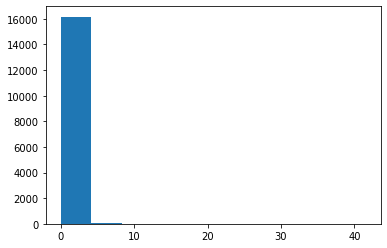

In [ ]:
plt.hist(df.NA_Sales)

(array([8847., 2683., 1302.,  807.,  560.,  363.,  265.,  219.,  162.,
         140.]),
 array([0.   , 0.099, 0.198, 0.297, 0.396, 0.495, 0.594, 0.693, 0.792,
        0.891, 0.99 ]),
 <a list of 10 Patch objects>)

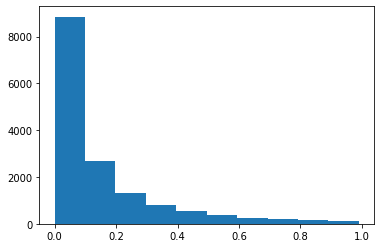

In [ ]:
plt.hist(df.NA_Sales[df.NA_Sales < 1])

#### EU_Sales

1) EU_Sales 통계량

In [ ]:
df.EU_Sales.describe()

count    16241.000000
mean         0.147378
std          0.508340
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64

2) Histogram

(array([1.6171e+04, 4.9000e+01, 1.2000e+01, 7.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  2.902,  5.804,  8.706, 11.608, 14.51 , 17.412, 20.314,
        23.216, 26.118, 29.02 ]),
 <a list of 10 Patch objects>)

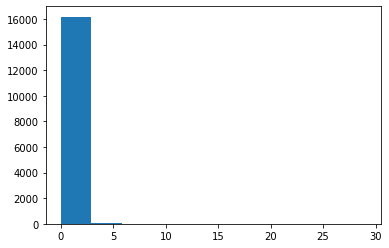

In [ ]:
plt.hist(df.EU_Sales)

(array([11813.,  1694.,   802.,   486.,   348.,   229.,   151.,    94.,
           84.,    73.]),
 array([0.   , 0.099, 0.198, 0.297, 0.396, 0.495, 0.594, 0.693, 0.792,
        0.891, 0.99 ]),
 <a list of 10 Patch objects>)

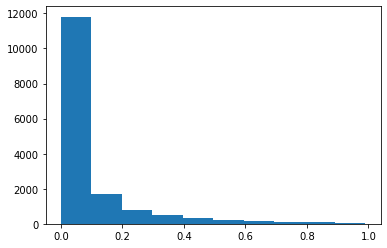

In [ ]:
plt.hist(df.EU_Sales[df.EU_Sales < 1])

#### JP_Sales

1) JP_Sales 통계량

In [ ]:
df.JP_Sales.describe()

count    16241.000000
mean         0.078283
std          0.309272
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64

2) Histogram

(array([1.6011e+04, 1.5300e+02, 3.8000e+01, 2.0000e+01, 1.0000e+01,
        5.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  1.022,  2.044,  3.066,  4.088,  5.11 ,  6.132,  7.154,
         8.176,  9.198, 10.22 ]),
 <a list of 10 Patch objects>)

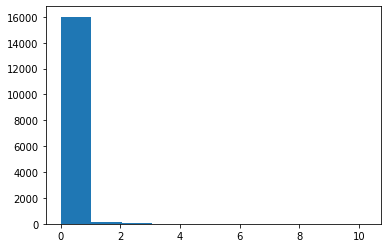

In [ ]:
plt.hist(df.JP_Sales)

(array([13694.,  1036.,   479.,   288.,   180.,   113.,    64.,    64.,
           50.,    35.]),
 array([0.   , 0.099, 0.198, 0.297, 0.396, 0.495, 0.594, 0.693, 0.792,
        0.891, 0.99 ]),
 <a list of 10 Patch objects>)

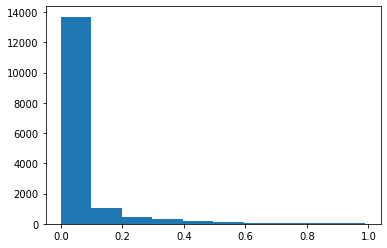

In [ ]:
plt.hist(df.JP_Sales[df.JP_Sales < 1])

#### Other_Sales

1) Other_Sales 통계량

In [ ]:
df.Other_Sales.describe()

count    16241.000000
mean         0.048234
std          0.189678
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64

2) Histogram

(array([1.6172e+04, 5.3000e+01, 1.1000e+01, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.   ,  1.057,  2.114,  3.171,  4.228,  5.285,  6.342,  7.399,
         8.456,  9.513, 10.57 ]),
 <a list of 10 Patch objects>)

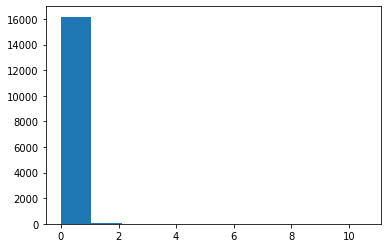

In [ ]:
plt.hist(df.Other_Sales)

(array([1.4441e+04, 9.7000e+02, 3.5700e+02, 1.5800e+02, 8.3000e+01,
        4.9000e+01, 3.8000e+01, 3.6000e+01, 1.9000e+01, 1.1000e+01]),
 array([0.   , 0.099, 0.198, 0.297, 0.396, 0.495, 0.594, 0.693, 0.792,
        0.891, 0.99 ]),
 <a list of 10 Patch objects>)

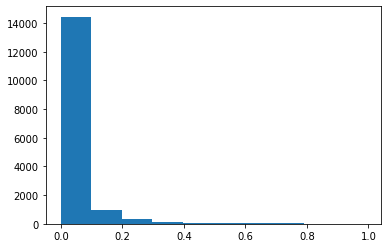

In [ ]:
plt.hist(df.Other_Sales[df.Other_Sales < 1])

#### Total_Sales

1) Total_Sales 통계량

In [ ]:
df.Total_Sales.describe()

count    16241.000000
mean         0.539091
std          1.563905
min          0.000000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Total_Sales, dtype: float64

2) Histogram

(array([1.6161e+04, 5.7000e+01, 1.3000e+01, 7.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  8.274, 16.548, 24.822, 33.096, 41.37 , 49.644, 57.918,
        66.192, 74.466, 82.74 ]),
 <a list of 10 Patch objects>)

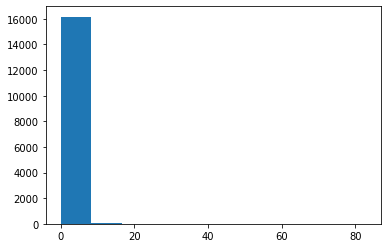

In [ ]:
plt.hist(df.Total_Sales)

(array([5611., 3070., 1729., 1054.,  844.,  613.,  438.,  340.,  261.,
         236.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

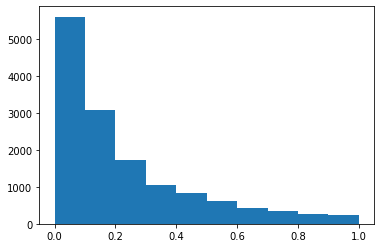

In [ ]:
plt.hist(df.Total_Sales[df.Total_Sales < 1])

### Categorical Variables 일원량분석(Univariate Exploration)

#### Platform

1) Platform 빈도

In [ ]:
df.Platform.value_counts()

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

2) histogram

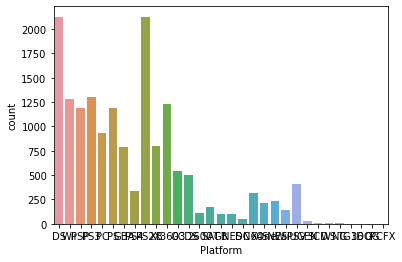

In [ ]:
sns.countplot(x='Platform' , data=df)

#### Year

1) Year 빈도

In [ ]:
df.Year.value_counts()

2009    1428
2008    1423
2010    1253
2007    1195
2011    1133
2006    1005
2005     934
2002     826
2003     774
2004     740
2012     652
2015     611
2014     580
2013     545
2001     480
1998     377
2000     348
2016     342
1999     336
1997     289
1996     262
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       8
2017       3
2020       1
Name: Year, dtype: int64

2) histogram

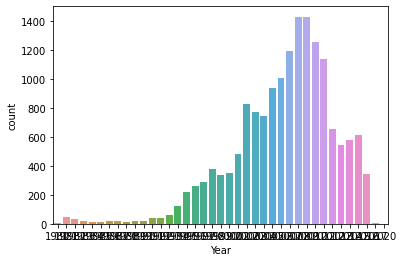

In [ ]:
sns.countplot(x='Year' , data=df)

#### Genre

1) Genre 빈도

In [ ]:
df.Genre.value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

2) histogram

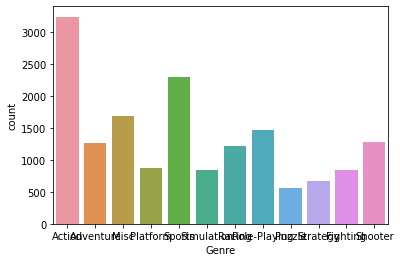

In [ ]:
sns.countplot(x='Genre' , data=df)

### 이원량분석(Bivariate Exploration)

#### 지역별 선호하는 게임 장르
꺽은선으로 지역별, 총 출고량을 확인

In [ ]:
df_genre_to = df.groupby(by=['Genre'])['Total_Sales'].sum() # 전 대륙 선호하는 게임 장르
df_genre_to = df_genre_to.reset_index()

df_genre_na = df.groupby(by=['Genre'])['NA_Sales'].sum() # 북미 선호하는 게임 장르
df_genre_na = df_genre_na.reset_index()

df_genre_eu = df.groupby(by=['Genre'])['EU_Sales'].sum() # 유럽 선호하는 게임 장르
df_genre_eu = df_genre_eu.reset_index()

df_genre_jp = df.groupby(by=['Genre'])['JP_Sales'].sum() # 일본 선호하는 게임 장르
df_genre_jp = df_genre_jp.reset_index()

df_genre_ot = df.groupby(by=['Genre'])['Other_Sales'].sum() # 기타 선호하는 게임 장르
df_genre_ot = df_genre_ot.reset_index()

df_genre = pd.concat([df_genre_to, df_genre_na['NA_Sales'], df_genre_eu['EU_Sales'], df_genre_jp['JP_Sales'], df_genre_ot['Other_Sales']], axis=1, join='inner')
df_genre

,Genre,Total_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,1712.98,858.75,513.64,156.60,183.99
1,Adventure,234.02,101.79,63.66,51.87,16.70
2,Fighting,443.54,220.35,99.90,87.14,36.15
3,Misc,779.70,394.73,208.15,104.18,72.64
4,Platform,827.99,445.38,200.63,130.53,51.45
5,Puzzle,240.73,121.58,50.47,56.24,12.44
6,Racing,722.55,354.70,235.02,56.32,76.51
7,Role-Playing,901.51,318.76,183.09,342.93,56.73
8,Shooter,1024.75,574.48,310.23,38.18,101.86
9,Simulation,389.28,181.43,112.99,63.54,31.32


Total Sales

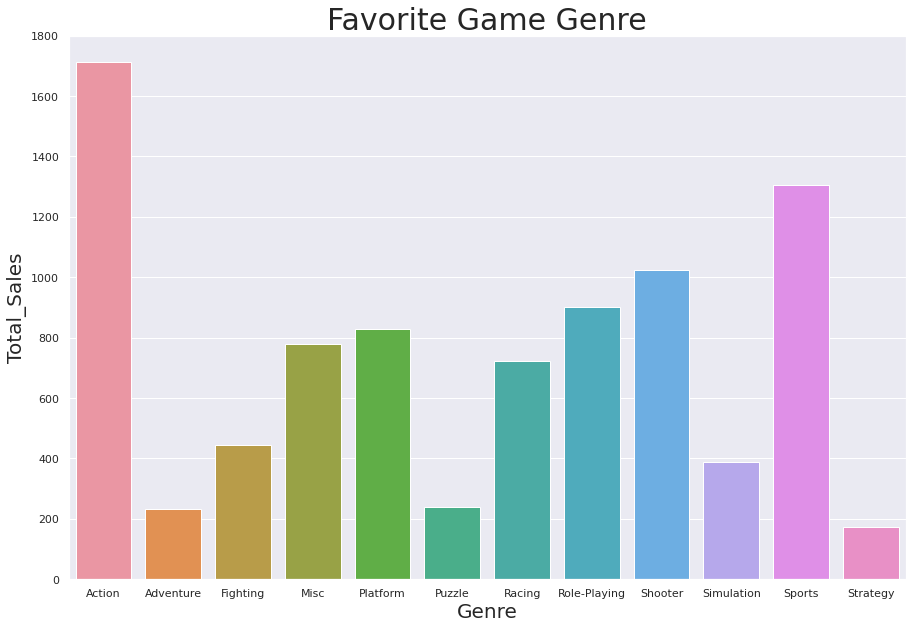

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.ylim(0, 1800)
plt.title("Favorite Game Genre", fontsize=30)
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Sales", fontsize=20)
sns.barplot(data=df_genre, x='Genre', y='Total_Sales')

NA Sales

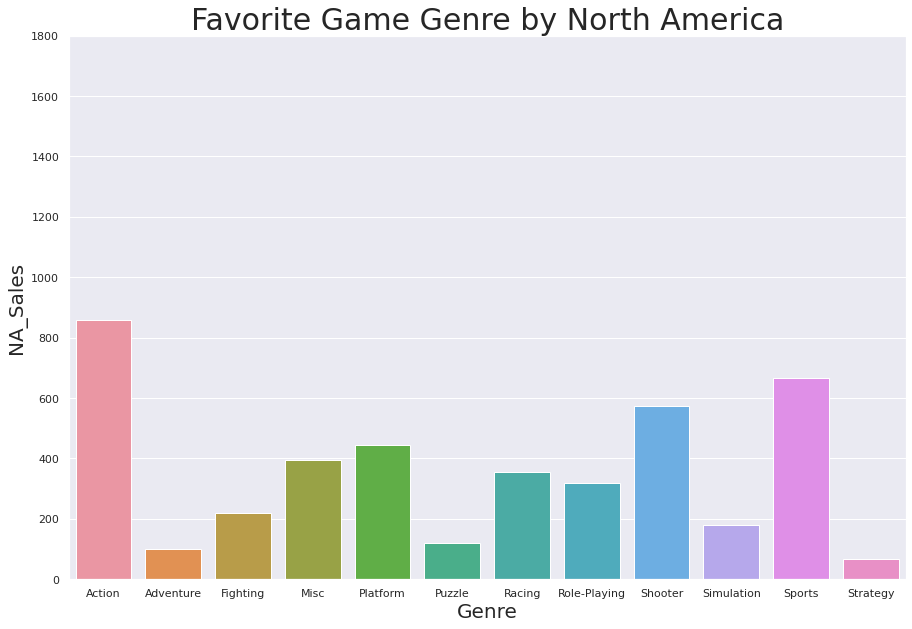

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.ylim(0, 1800)
plt.title("Favorite Game Genre by North America", fontsize=30)
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Sales", fontsize=20)
sns.barplot(data=df_genre, x='Genre', y='NA_Sales')

EU Sales

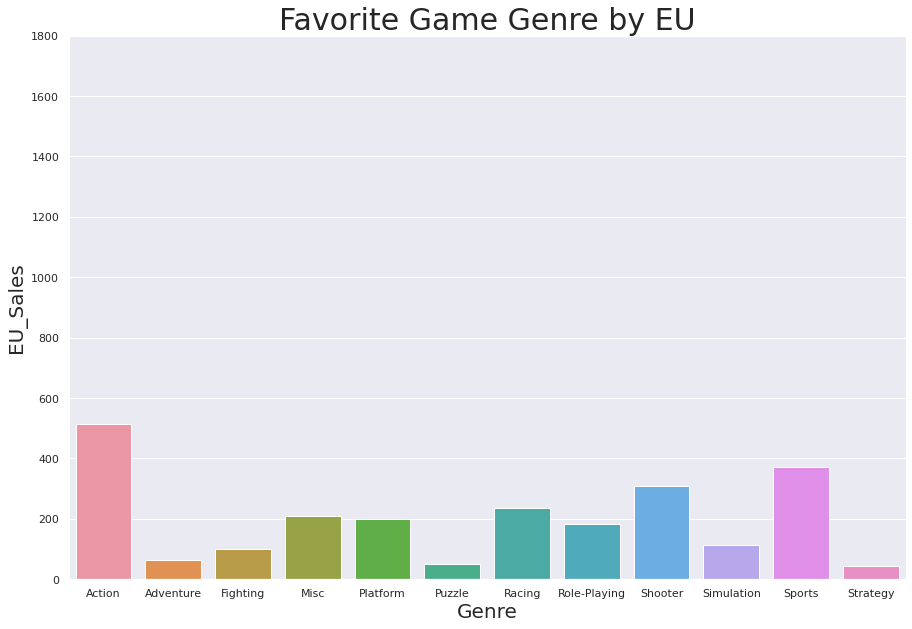

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.ylim(0, 1800)
plt.title("Favorite Game Genre by EU", fontsize=30)
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Sales", fontsize=20)
sns.barplot(data=df_genre, x='Genre', y='EU_Sales')

JP Sales

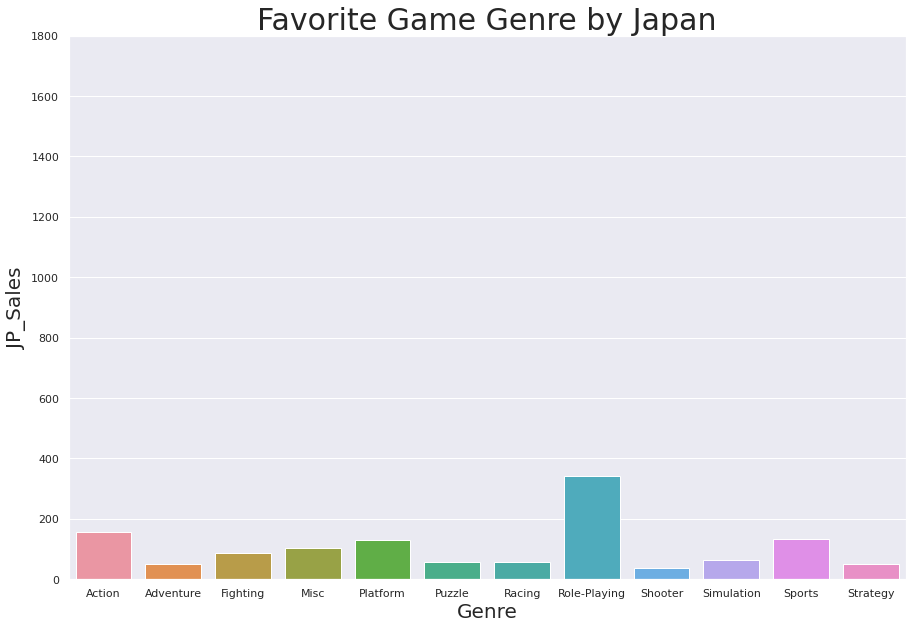

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.ylim(0, 1800)
plt.title("Favorite Game Genre by Japan", fontsize=30)
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Sales", fontsize=20)
sns.barplot(data=df_genre, x='Genre', y='JP_Sales')

#### 연도별 게임 트렌드
lineplot으로 비교하고 max장르를 위에 글로 표시

In [ ]:
df_year_sale = df.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
df_year_sale.head()

,Year,Genre,Total_Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1981,Action,14.79


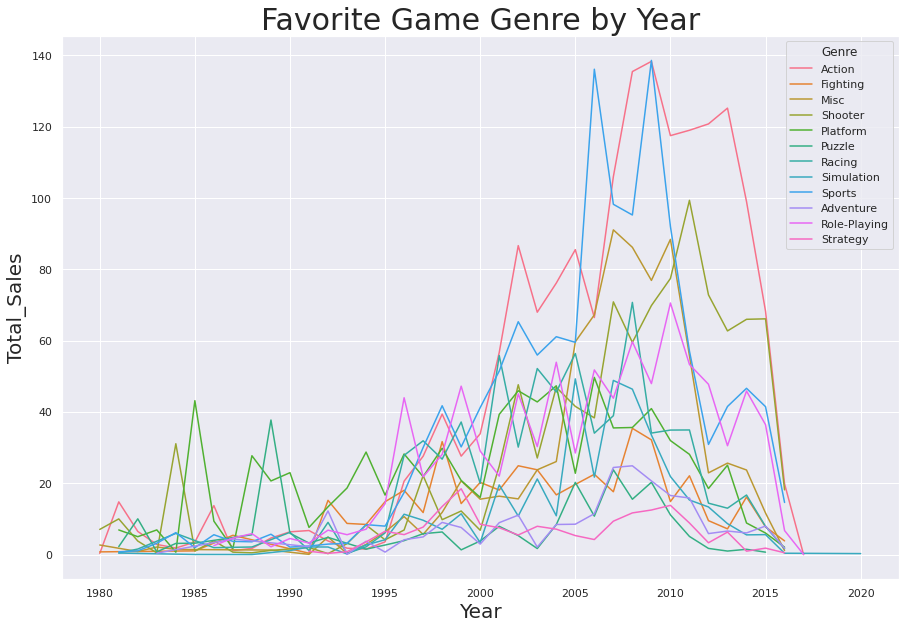

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.title("Favorite Game Genre by Year", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total_Sales", fontsize=20)
sns.lineplot(data=df_year_sale, x="Year", y="Total_Sales", hue="Genre")

max값만 모아서 plot

In [ ]:
year_sale = df_year_sale.groupby(by=['Year'])['Total_Sales'].transform(max) == df_year_sale['Total_Sales']
df_year_sale_max = df_year_sale[year_sale].reset_index(drop=True)
df_year_sale_max.head()

,Year,Genre,Total_Sales
0,1980,Shooter,7.07
1,1981,Action,14.79
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10


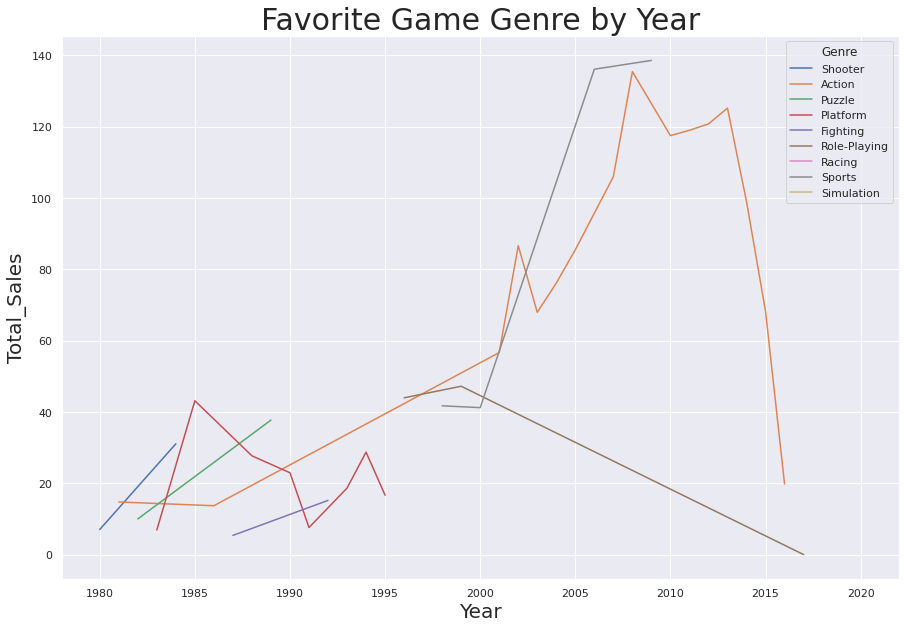

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.title("Favorite Game Genre by Year", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total_Sales", fontsize=20)
sns.lineplot(data=df_year_sale_max, x="Year", y="Total_Sales", hue="Genre")

#### 인기게임 분석
2000년이후 게임 출고량을 지역별로 시각화

Total Sales

In [ ]:
df_tmp = df[df['Year']>=2000].sort_values(by=['Total_Sales'], ascending=False)
df_sortedto = df_tmp.head(10)
df_sortedto = df_sortedto[['Name', 'Platform', 'Year', 'Genre', 'Total_Sales']]
df_sortedto = df_sortedto.reset_index(drop=True)
df_sortedto

,Name,Platform,Year,Genre,Total_Sales
0,Wii Sports,Wii,2006,Sports,82.74
1,Mario Kart Wii,Wii,2008,Racing,35.83
2,Wii Sports Resort,Wii,2009,Sports,33.00
3,New Super Mario Bros.,DS,2006,Platform,30.01
4,Wii Play,Wii,2006,Misc,29.01
5,New Super Mario Bros. Wii,Wii,2009,Platform,28.61
6,Nintendogs,DS,2005,Simulation,24.75
7,Mario Kart DS,DS,2005,Racing,23.43
8,Wii Fit,Wii,2007,Sports,22.72
9,Wii Fit Plus,Wii,2009,Sports,22.00


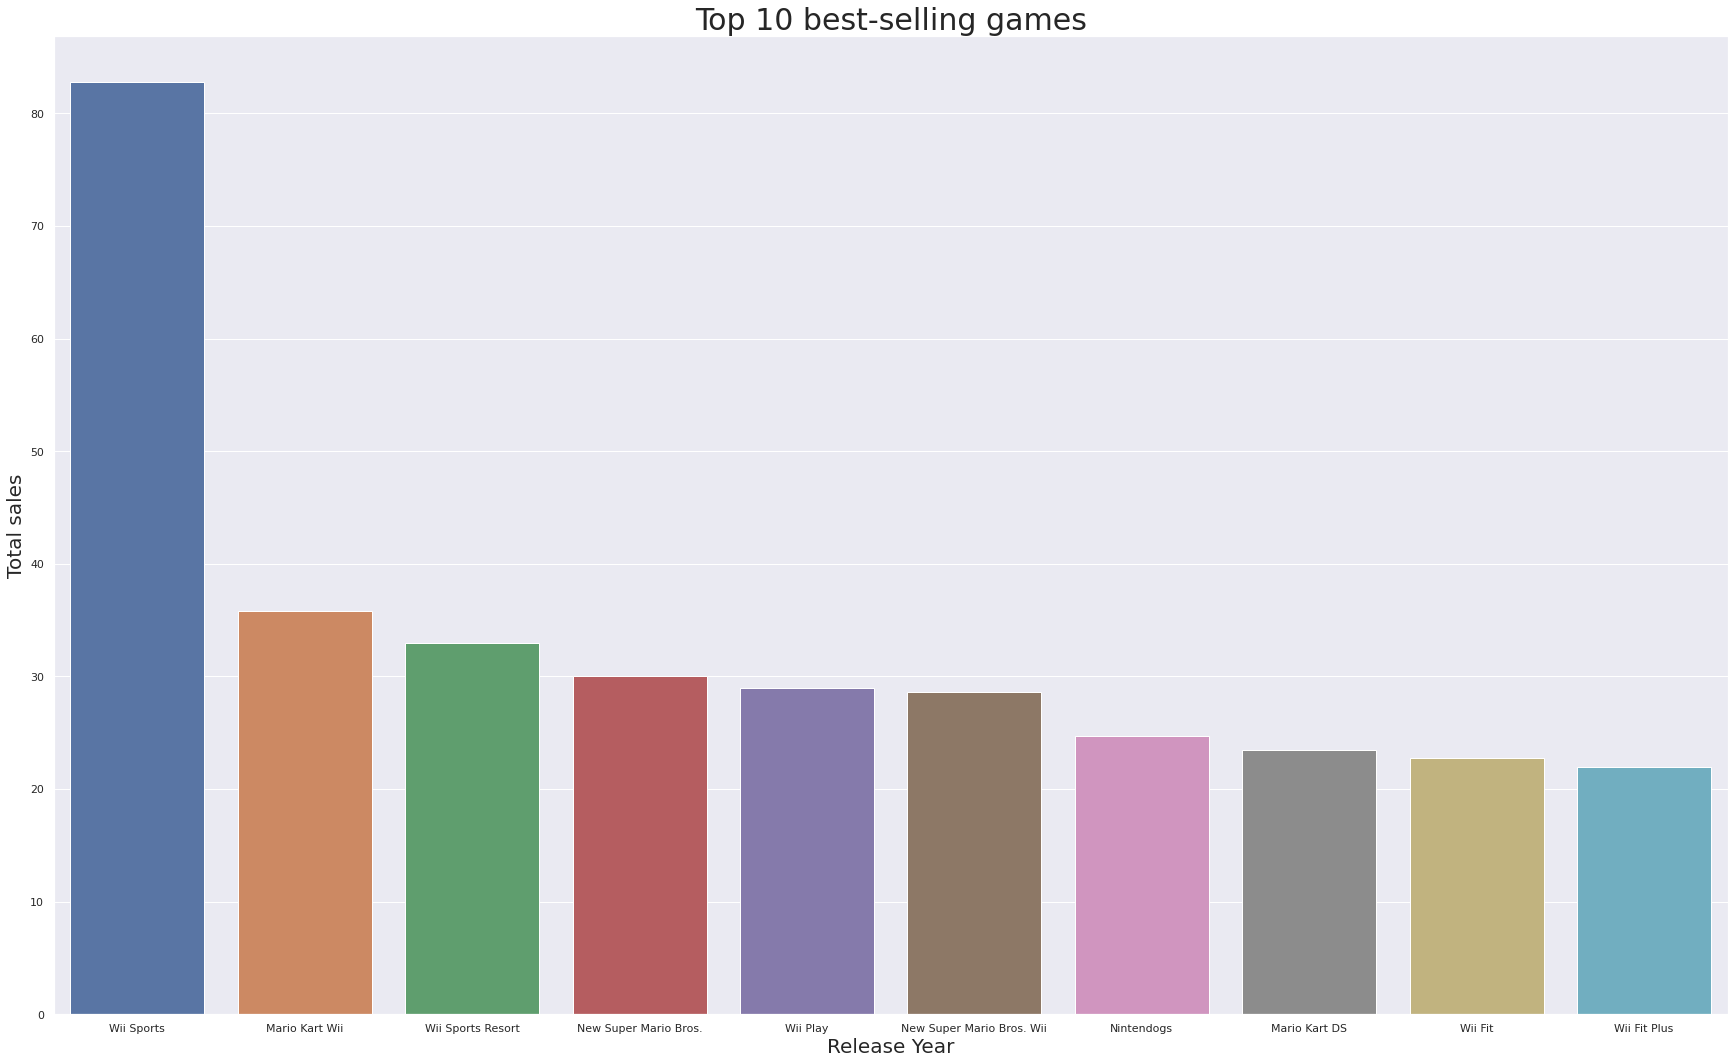

In [ ]:
plt.figure(figsize=(30, 18))
sns.barplot(x='Name', y='Total_Sales', data=df_sortedto)

plt.title("Top 10 best-selling games", fontsize=30)
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("Total sales", fontsize=20)
plt.show()

NA Sales

In [ ]:
df_tmp = df[df['Year']>=2000].sort_values(by=['NA_Sales'], ascending=False)
df_sortedNA = df_tmp.head(10)
df_sortedNA = df_sortedNA[['Name', 'Year', 'Genre', 'NA_Sales']]
df_sortedNA = df_sortedNA.reset_index(drop=True)
df_sortedNA.head()

,Name,Year,Genre,NA_Sales
0,Wii Sports,2006,Sports,41.49
1,Mario Kart Wii,2008,Racing,15.85
2,Wii Sports Resort,2009,Sports,15.75
3,Kinect Adventures!,2010,Misc,14.97
4,New Super Mario Bros. Wii,2009,Platform,14.59


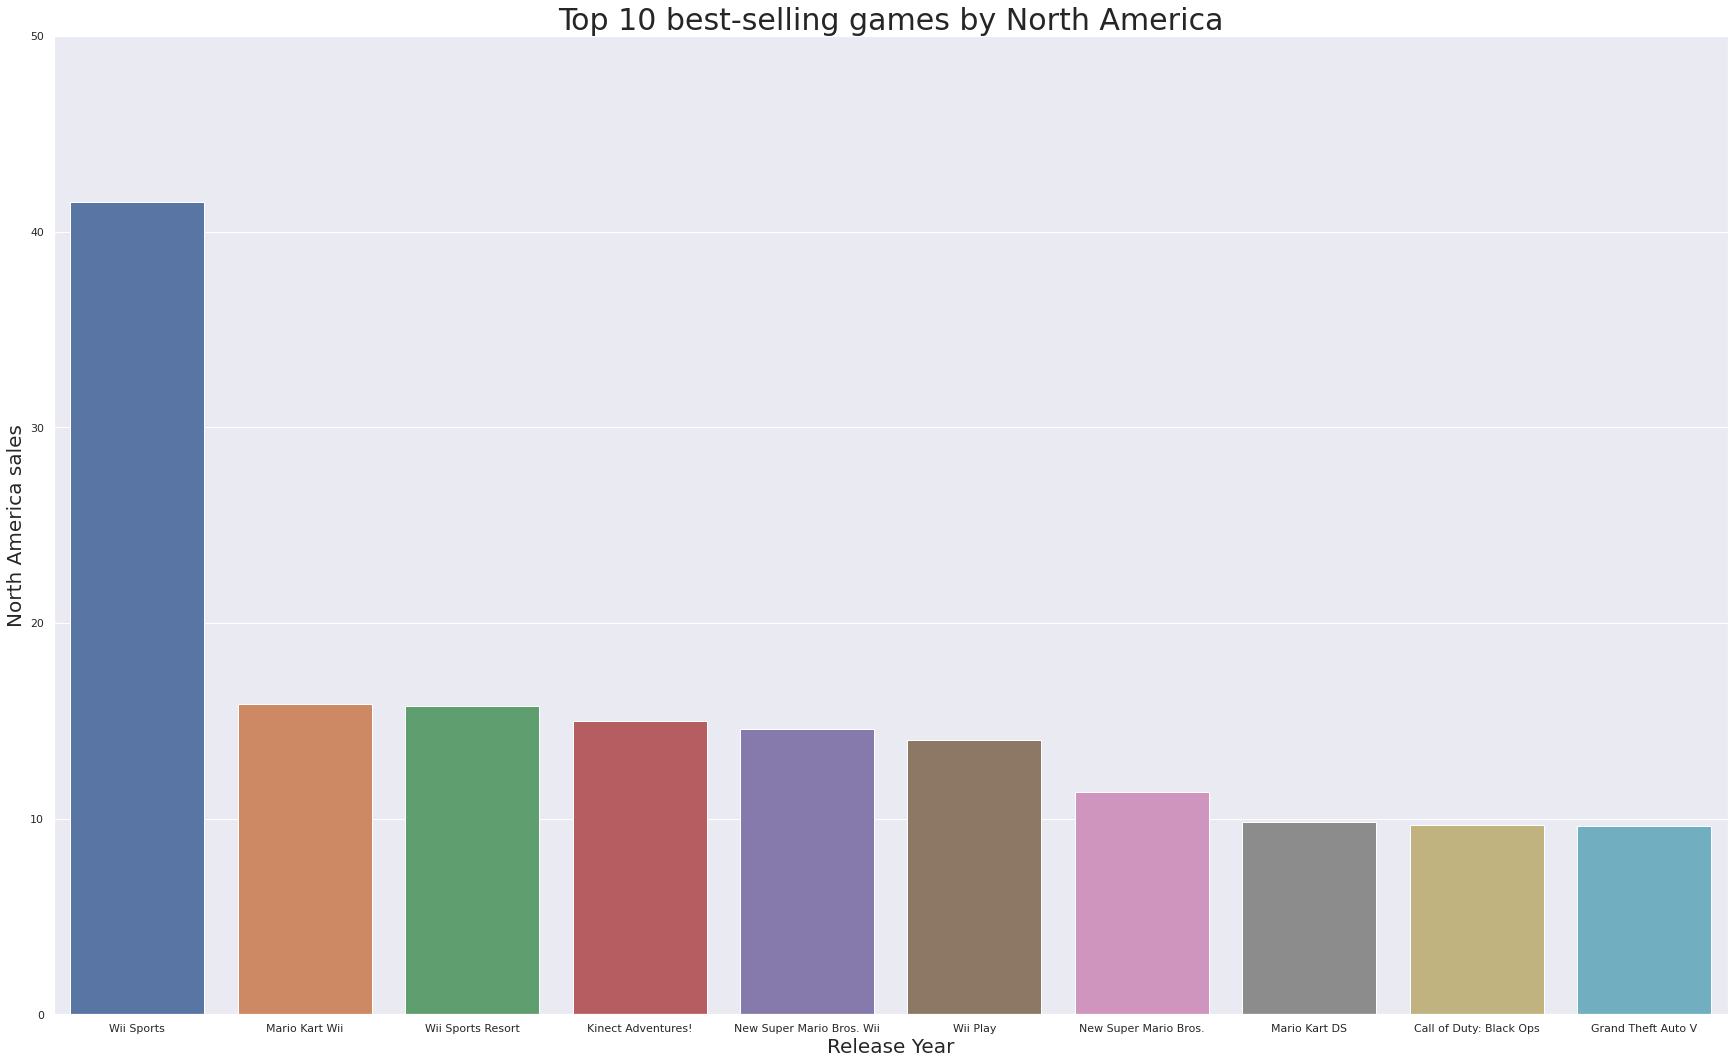

In [ ]:
plt.figure(figsize=(30, 18))
sns.barplot(x='Name', y='NA_Sales', data=df_sortedNA)

plt.title("Top 10 best-selling games by North America", fontsize=30)
plt.ylim(0, 50)
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("North America sales", fontsize=20)
plt.show()

EU Sales

In [ ]:
df_tmp = df[df['Year']>=2000].sort_values(by=['EU_Sales'], ascending=False)
df_sortedEU = df_tmp.head(10)
df_sortedEU = df_sortedEU[['Name', 'Year', 'Genre', 'EU_Sales']]
df_sortedEU = df_sortedEU.reset_index(drop=True)
df_sortedEU.head()

,Name,Year,Genre,EU_Sales
0,Wii Sports,2006,Sports,29.02
1,Mario Kart Wii,2008,Racing,12.88
2,Wii Sports Resort,2009,Sports,11.01
3,Nintendogs,2005,Simulation,11.00
4,Grand Theft Auto V,2013,Action,9.27


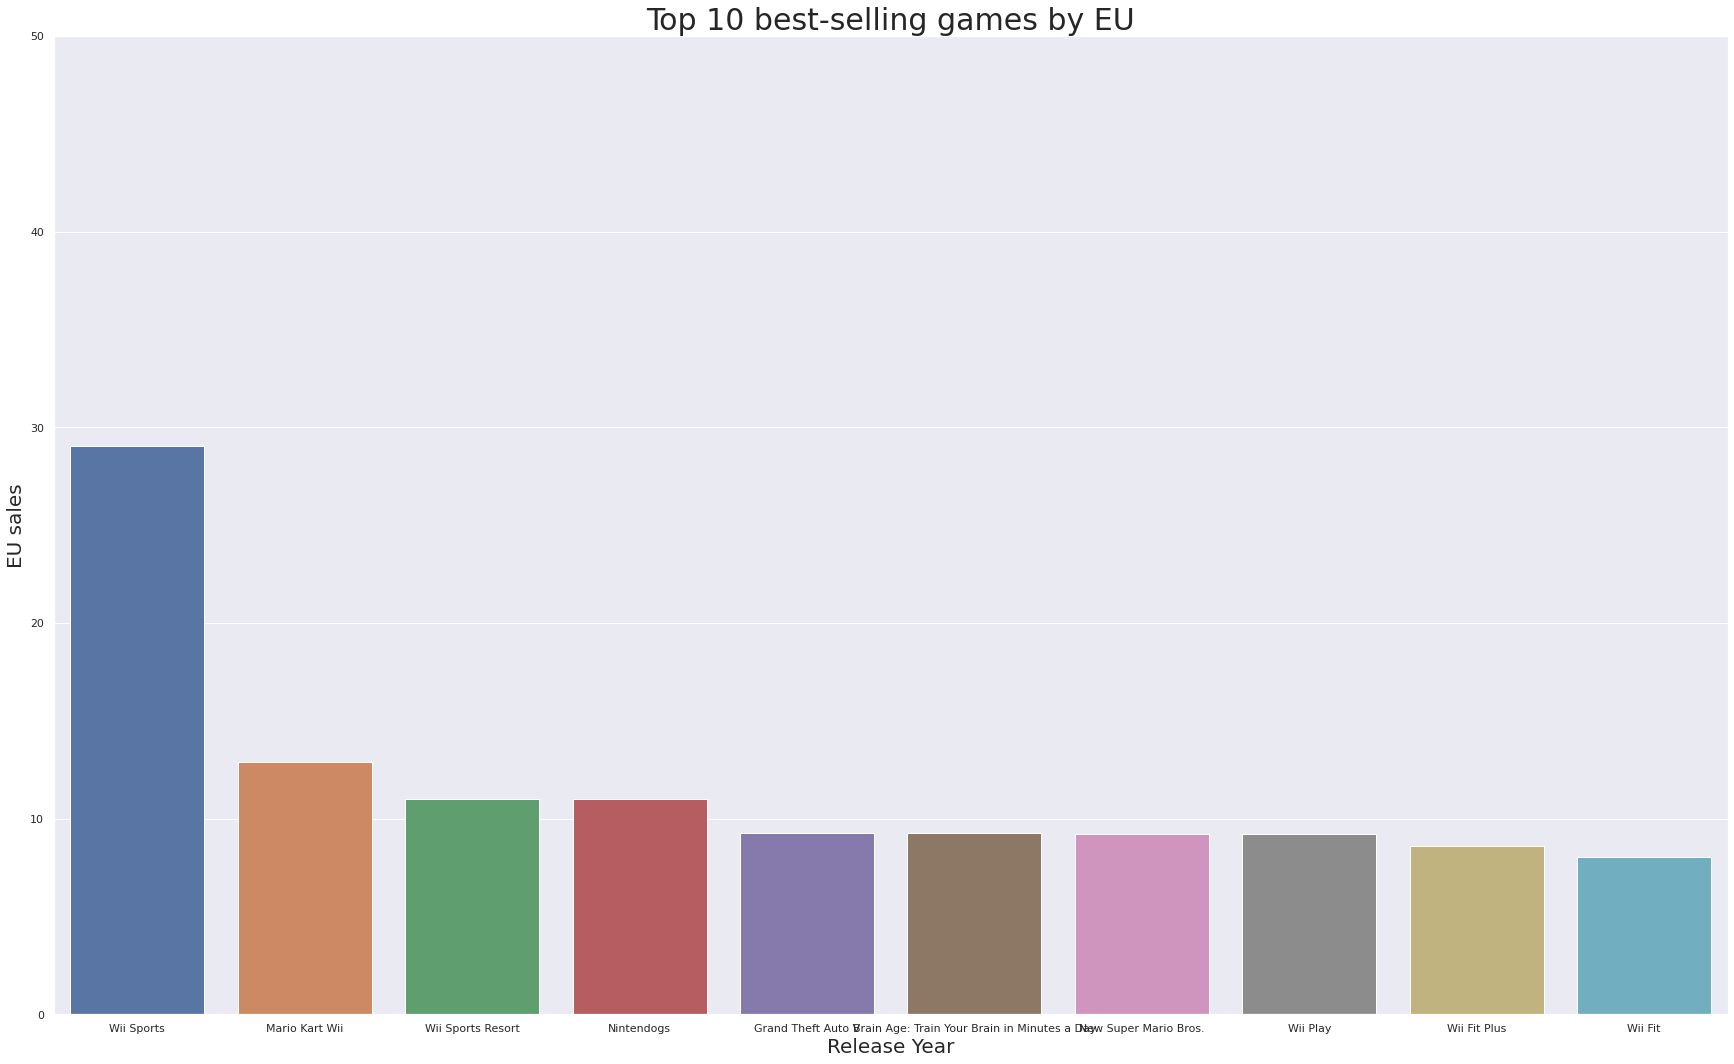

In [ ]:
plt.figure(figsize=(30, 18))
sns.barplot(x='Name', y='EU_Sales', data=df_sortedEU)

plt.title("Top 10 best-selling games by EU", fontsize=30)
plt.ylim(0, 50)
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("EU sales", fontsize=20)
plt.show()

JP Sales

In [ ]:
df_tmp = df[df['Year']>=2000].sort_values(by=['JP_Sales'], ascending=False)
df_sortedJP = df_tmp.head(10)
df_sortedJP = df_sortedJP[['Name', 'Year', 'Genre', 'JP_Sales']]
df_sortedJP = df_sortedJP.reset_index(drop=True)
df_sortedJP.head()

,Name,Year,Genre,JP_Sales
0,New Super Mario Bros.,2006,Platform,6.50
1,Pokemon Diamond/Pokemon Pearl,2006,Role-Playing,6.04
2,Pokemon Black/Pokemon White,2010,Role-Playing,5.65
3,Pokemon Ruby/Pokemon Sapphire,2002,Role-Playing,5.38
4,Animal Crossing: Wild World,2005,Simulation,5.33


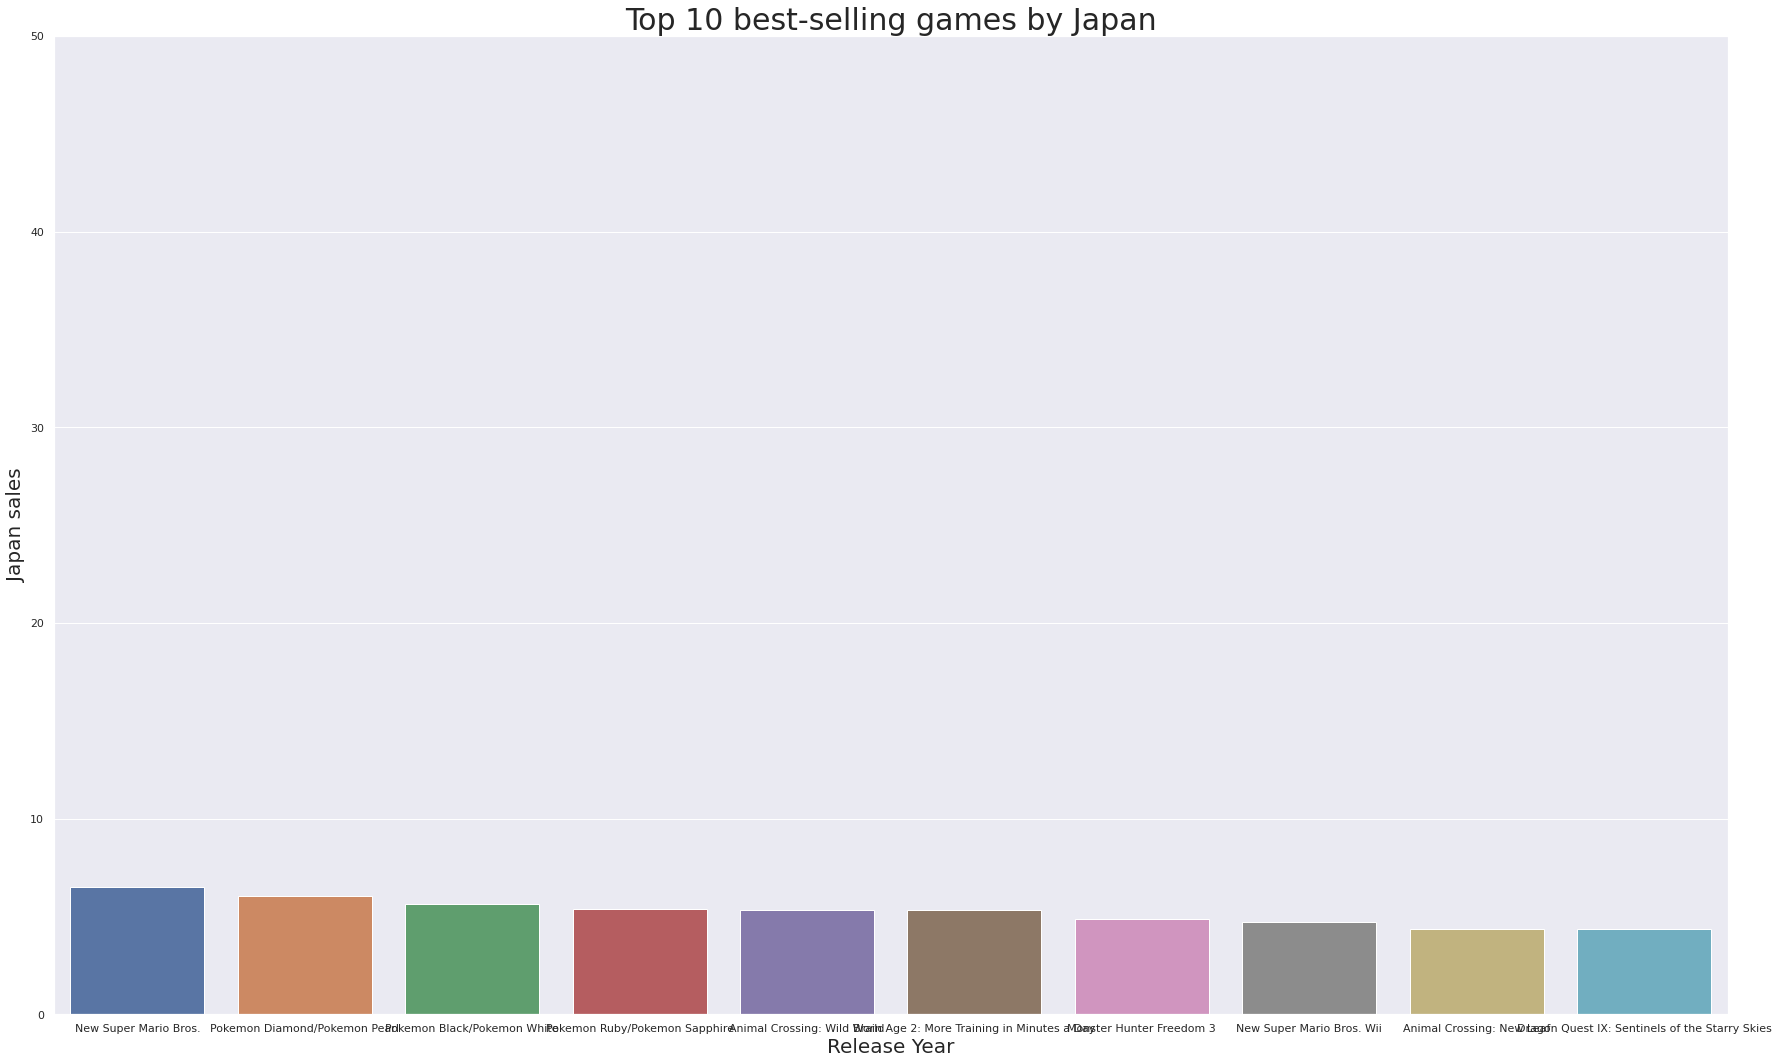

In [ ]:
plt.figure(figsize=(30, 18))
sns.barplot(x='Name', y='JP_Sales', data=df_sortedJP)

plt.title("Top 10 best-selling games by Japan", fontsize=30)
plt.ylim(0, 50)
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("Japan sales", fontsize=20)
plt.show()

#### 지역별 선호 플랫폼
2010년대 이후 각 플랫폼별(PC, Playstaion, Nintendo, Xbox) 조건으로 데이터를 저장한 후 지역간 출고량을 박스플롯으로 표현
* PC
* PS, PS2, PS3, PS4, PSV, PSP
* DS, Wii, 3DS, N64, NES, SNES, WiiU
* XB, X360, XOne

2010년 이후 각플랫폼을 PC, Playstation, Nintendo, Xbox로 변경후 df_plat저장

In [ ]:
playstation = ['PS', 'PS2', 'PS3', 'PS4', 'PSV', 'PSP']
nintendo = ['DS', 'Wii', '3DS', 'N64', 'NES', 'SNES', 'WiiU']
xbox = ['XB', 'X360', 'XOne']
df_plat = df[(df['Year']>=2010)]
df_plat = df_plat.replace(playstation, 'Playstation')
df_plat = df_plat.replace(nintendo, 'Nintendo')
df_plat = df_plat.replace(xbox, 'Xbox')
df_plat.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,Playstation,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,Nintendo,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,Playstation,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
9,The Penguins of Madagascar: Dr. Blowhole Retur...,Playstation,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08


2010년 이후 플랫폼간 barplot

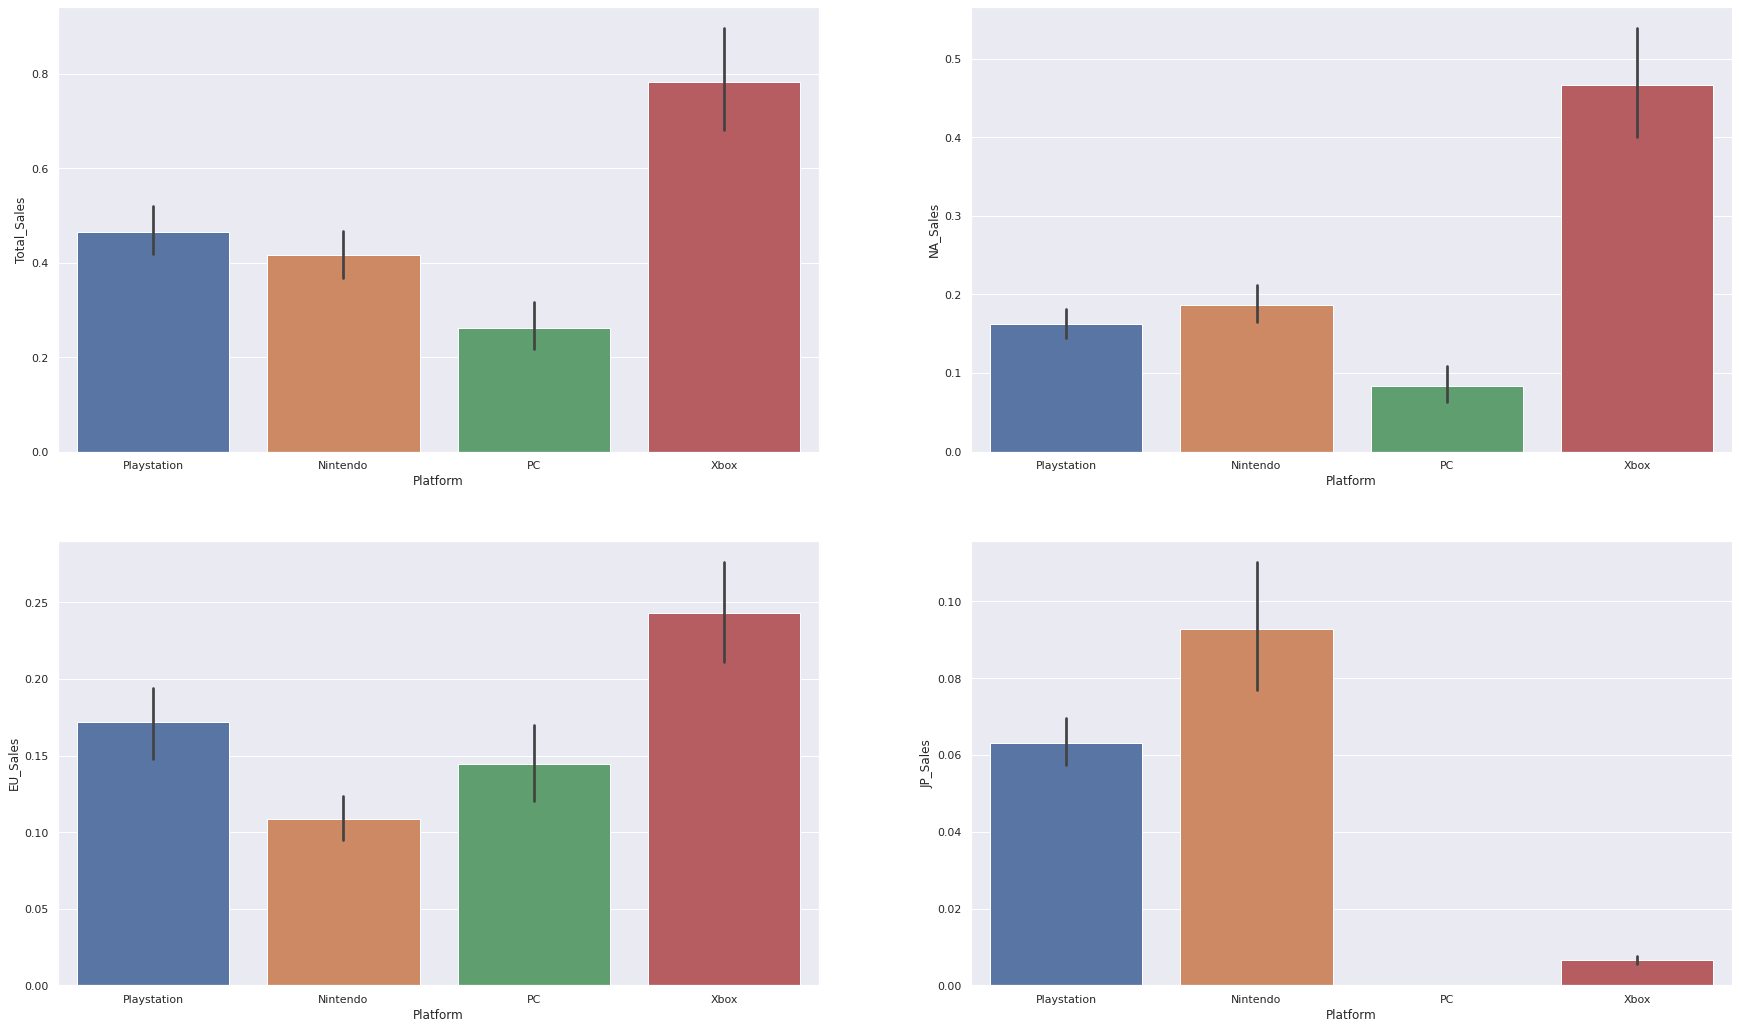

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(30, 18))
sns.barplot(x='Platform', y='Total_Sales', data=df_plat, ax=axes[0,0])
sns.barplot(x='Platform', y='NA_Sales', data=df_plat, ax=axes[0,1])
sns.barplot(x='Platform', y='EU_Sales', data=df_plat, ax=axes[1,0])
sns.barplot(x='Platform', y='JP_Sales', data=df_plat, ax=axes[1,1])
plt.show()